<h1><center>CSEN1022:Assignment 3</center></h1>
<h3><center>Winter 2021</center></h3>
<hr style="border:2px solid black"> </hr>

## <u> Please don't forget to fill in this data </u>
**Member 1**

Name: Hesham Abdulhamid 

GUC-ID: 43-1684

Elective Tutorial No.: T-06

**Member 2**

Name: Muhammed Ehab

GUC-ID: 43-7667

Elective Tutorial No.: T-02

<hr style="border:2px solid black"> </hr>

## Imports (Don't Edit)

In [1]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data

In [2]:
# X_train, X_test
# THE image categories are different.


from PIL import Image

def our_reshapeColors(image_array): 
    image_reshaped = np.zeros([1, len(image_array) * 3], dtype=float)
    arr = np.reshape(image_array, 3072)
    for x in range(len(arr)):
        image_reshaped[0][x] = arr[x]
    return image_reshaped

def our_reshapeColors2(image_array,n): 
    image_reshaped = np.zeros([1, n*n*3], dtype=float)
    arr = np.reshape(image_array, n*n*3)
    for x in range(len(arr)):
        image_reshaped[0][x] = arr[x]
    return image_reshaped

def readData():
    nRGB = 3072
    
      ############### LOAD X-TRAIN ###########

    x_train = np.zeros([15000, nRGB], dtype=float)

    for x in range(5000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/assignment_3-hghonim27-master/Data/train/airplane/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            x_train[x][y]=image_reshaped[0][y]/255

    for x in range(5000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/assignment_3-hghonim27-master/Data/train/bird/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            x_train[x+5000][y]=image_reshaped[0][y]/255

    for x in range(5000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/assignment_3-hghonim27-master/Data/train/truck/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            x_train[x+10000][y]=image_reshaped[0][y]/255 
            
            
     ############### LOAD X-TEST ###########

    X_test = np.zeros([3000, nRGB], dtype=float)

    for x in range(1000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/assignment_3-hghonim27-master/Data/test/airplane/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            X_test[x][y]=image_reshaped[0][y]/255

    for x in range(1000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/assignment_3-hghonim27-master/Data/test/bird/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            X_test[x+1000][y]=image_reshaped[0][y]/255

    for x in range(1000):
        trained_img = Image.open("C:/Users/Hesham Ghonim/Desktop/assignment_3-hghonim27-master/Data/test/truck/" + str(x) + ".jpg")
        image_sequence = trained_img.getdata()
        image_array = np.array(image_sequence)
        image_reshaped = our_reshapeColors(image_array)
        for y in range(nRGB):
            X_test[x+2000][y]=image_reshaped[0][y]/255
            
    return x_train,X_test
            

<hr style="border:2px solid black"> </hr>

# Perform K means clustering for all 3 classes (Training Data).
### Return (memberships, centroids, dbi) --> (vector, matrix, scalar value).

In [99]:
(x_train, X_test) = readData()

In [168]:
def Calculate_Membership_Vector(Random_Centroids, x_train_data) :
    euc_distances_0 = np.sqrt(np.square(x_train_data - Random_Centroids[0]).sum(axis = 1))
    euc_distances_1 = np.sqrt(np.square(x_train_data - Random_Centroids[1]).sum(axis = 1))
    euc_distances_2 = np.sqrt(np.square(x_train_data - Random_Centroids[2]).sum(axis = 1))

    return np.argmin(np.concatenate([euc_distances_0, euc_distances_1, euc_distances_2]).reshape(3, -1), axis = 0)

def Calculate_Centroids(Random_Centroids, x_train_data):
    membership_vector = Calculate_Membership_Vector(Random_Centroids, x_train_data)
    membership_vector.shape=((1,15000))

    new_centroids     = np.ndarray((3, len(x_train_data[0])))
    new_centroids[0]  = np.mean(x_train_data[membership_vector[0] == 0], axis = 0)
    new_centroids[1]  = np.mean(x_train_data[membership_vector[0] == 1], axis = 0)
    new_centroids[2]  = np.mean(x_train_data[membership_vector[0] == 2], axis = 0)

    return (new_centroids, membership_vector) if np.array_equal(new_centroids, Random_Centroids) else Calculate_Centroids(new_centroids, x_train_data)

def Calculate_DBI(new_centroids,x_train_data,membership_vector):
    euc_distances_0 = np.sqrt(np.square(x_train_data[membership_vector[0] == 0] - new_centroids[0]).sum(axis = 1))
    euc_distances_1 = np.sqrt(np.square(x_train_data[membership_vector[0] == 1] - new_centroids[1]).sum(axis = 1))
    euc_distances_2 = np.sqrt(np.square(x_train_data[membership_vector[0] == 2] - new_centroids[2]).sum(axis = 1))
    
    S0=np.mean(euc_distances_0)
    S1=np.mean(euc_distances_1)
    S2=np.mean(euc_distances_2)
    
    
    M01=(new_centroids[0]-new_centroids[1]).sum()
    M02=(new_centroids[0]-new_centroids[2]).sum()
    M12=(new_centroids[1]-new_centroids[2]).sum()
    
    R01 = (S0 + S1)/M01
    R02 = (S0 + S2)/M02
    R12 = (S1 + S2)/M12
    
    
    return max(R01,R02,R12)

def K_means_clustering (x_train):
    
    Random_Centroids=np.zeros((3,3072))
    Random_Centroids=x_train[np.random.choice(x_train.shape[0], size = 3)]

    new_centroids,membership_vector=Calculate_Centroids(Random_Centroids,x_train)
    DBI_value=Calculate_DBI(new_centroids,x_train,membership_vector)

    return (membership_vector, new_centroids, DBI_value)

<hr style="border:2px solid black"> </hr>

# Repeat the previous process 10 times. 
### Pick the membership vector and the centroids matrix corresponding to the best dbi.
##### Make sure you return max_counts and confusion_matrix.
(keep history in whatever datastructure you like).

In [198]:
def Calculate_Predictors(centroids, membership_vector, data):
    cluster_1 = [len(data[:5000][membership_vector[0][:5000] == 0]), 
                 len(data[:5000][membership_vector[0][:5000] == 1]), 
                 len(data[:5000][membership_vector[0][:5000] == 2])] 

    cluster_2 = [len(data[5000:10000][membership_vector[0][5000:10000] == 0]), 
                 len(data[5000:10000][membership_vector[0][5000:10000] == 1]), 
                 len(data[5000:10000][membership_vector[0][5000:10000] == 2])]

    cluster_3 = [len(data[10000:][membership_vector[0][10000:] == 0]), 
                 len(data[10000:][membership_vector[0][10000:] == 1]), 
                 len(data[10000:][membership_vector[0][10000:] == 2])]

    airplane_cluster_index = np.argmax([cluster_1])
    bird_cluster_index     = np.argmax([cluster_2])
    truck_cluster_index    = np.argmax([cluster_3])

    return (np.concatenate([centroids[airplane_cluster_index], centroids[bird_cluster_index], centroids[truck_cluster_index]]).reshape(3, -1), 
                           np.array([cluster_1[airplane_cluster_index], cluster_2[bird_cluster_index], cluster_3[truck_cluster_index]]))

In [206]:
history=[]
for i in range(10):
    mv,centroid,dbi=K_means_clustering (x_train)
    history.append(dbi)
    history.append(mv)
    history.append(centroid)
    
filter_indices = [0,3,6,9,12,15,18,21,24,27]
history=np.asarray(history)
best_dbi_index=np.argmin(history[filter_indices])

best_dbi = history[best_dbi_index*3]
best_membership_matrix = history[best_dbi_index*3+1]
best_centroids = history[best_dbi_index*3+2]


predictors, counts = Calculate_Predictors(best_centroids, best_membership_matrix, x_train)
Row = Calculate_Membership_Vector(predictors, X_test)

max_counts = counts
confusion_matrix = np.array([[len(X_test[: 1000][Row[: 1000] == 0]), 
                             len(X_test[: 1000][Row[: 1000] == 1]), 
                             len(X_test[: 1000][Row[: 1000] == 2])], 
                            [len(X_test[1000 : 2000][Row[1000 : 2000] == 0]), 
                             len(X_test[1000 : 2000][Row[1000 : 2000] == 1]), 
                             len(X_test[1000 : 2000][Row[1000 : 2000] == 2])], 
                            [len(X_test[2000:][Row[2000:] == 0]), 
                             len(X_test[2000:][Row[2000:] == 1]), 
                             len(X_test[2000:][Row[2000:] == 2])]
                            ])



<hr style="border:2px solid black"> </hr>

## Don't Edit the Following Cells, Just Run & Save them.

Text(0.5, 1.0, 'Best Counts')

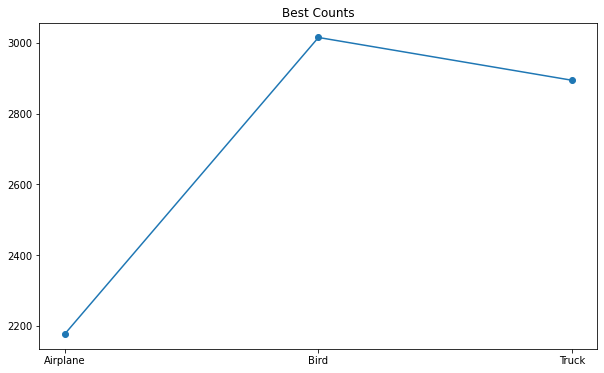

In [208]:
plt.figure(figsize=(10,6))
plt.plot(['Airplane','Bird','Truck'],max_counts,'-o')
plt.title('Best Counts')

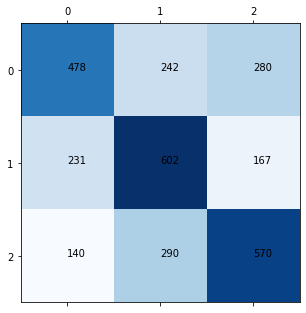

In [209]:
plt.rc('figure', figsize=[5,5])
plt.matshow(confusion_matrix,cmap="Blues")
for i in range(0,confusion_matrix.shape[0]):
    for j in range(0,confusion_matrix.shape[1]):
        plt.annotate(confusion_matrix[i,j],(j,i))